In [1]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data/reddit.csv')

display(data.head())

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [3]:
data.shape

(37249, 2)

In [4]:
data.sample()['clean_comment'].values

array([' brown man the usa this severely disappointed '], dtype=object)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [6]:
data.dropna(inplace=True)

In [7]:
data.drop_duplicates(inplace=True)


In [8]:
data[(data['clean_comment'].str.strip() == '')]

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [9]:
data = data[~(data['clean_comment'].str.strip() == '')]

In [10]:
data['clean_comment'] = data['clean_comment'].str.lower()
data.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [11]:
data[data['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37241,let the janta decide not ulema clerics,0
37242,hona hai same with vaccination education insu...,0
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [12]:
print(data['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' ')).sum())

data['clean_comment'] = data['clean_comment'].str.strip()

print(data['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' ')).sum())

32266
0


check if comment has a url

In [13]:
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments_with_urls = data[data['clean_comment'].str.contains(url_pattern, regex=True)]

comments_with_urls.head()


,clean_comment,category


check if comment has '\n'

In [14]:
comments_with_newline = data[data['clean_comment'].str.contains('\n')]

comments_with_newline.head()

,clean_comment,category
448,what missing jpg\nand why this brilliant edit ...,1
781,india has been ruined congress and populist sc...,-1
847,like aap for its stand corruption and making p...,-1
871,reduced trade\ndeficit stronger rupee aren the...,0
1354,amsa press conference australian maritime safe...,1


In [15]:
data['clean_comment'] = data['clean_comment'].str.replace('\n', ' ', regex=True)

comments_with_newline_remaining = data[data['clean_comment'].str.contains('\n')]
comments_with_newline_remaining

,clean_comment,category


**Exploratory Data Analysis (EDA)**

<Axes: xlabel='category', ylabel='count'>

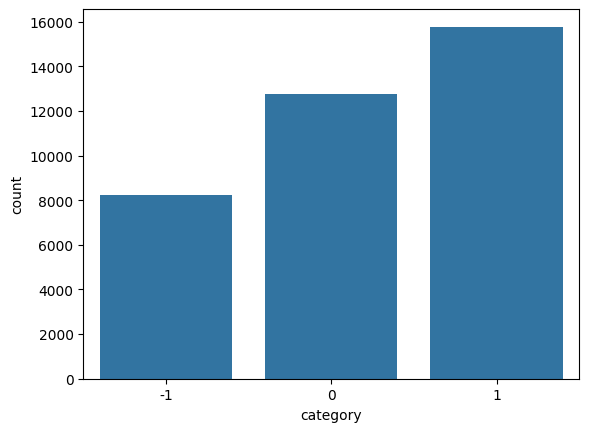

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data,x='category')

percantage of cotegories

In [17]:
data['category'].value_counts(normalize=True).mul(100).round(2)

category
 1    42.86
 0    34.71
-1    22.42
Name: proportion, dtype: float64

Count words in each comment

In [18]:
data['word_count'] = data['clean_comment'].apply(lambda x: len(x.split()))
data.sample(5)

,clean_comment,category,word_count
18466,five people had gone her house have taken this...,-1,53
16054,hehe,0,1
28919,extremely proud you for being enlightened such...,1,55
31148,gotta admire the reporter composure,0,5
17270,game resident evil huge patches every year onl...,1,50


In [19]:
data['word_count'].describe()

count    36793.000000
mean        29.667464
std         56.790738
min          1.000000
25%          6.000000
50%         13.000000
75%         30.000000
max       1307.000000
Name: word_count, dtype: float64

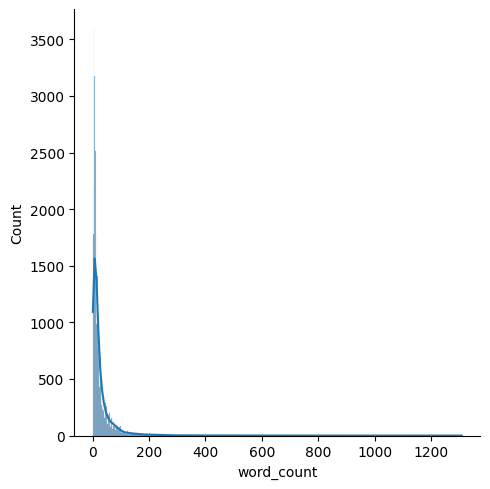

In [20]:
sns.displot(data['word_count'], kde=True)

<function matplotlib.pyplot.show(close=None, block=None)>

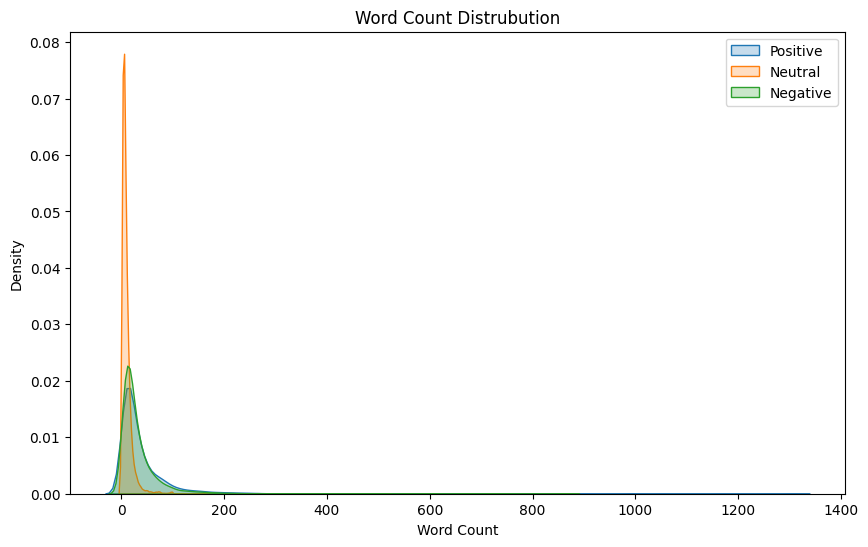

In [21]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data[data['category'] == 1]['word_count'], label='Positive', fill=True)
sns.kdeplot(data[data['category'] == 0]['word_count'], label='Neutral', fill=True)
sns.kdeplot(data[data['category'] == -1]['word_count'], label='Negative', fill=True)

plt.title('Word Count Distrubution')
plt.xlabel('Word Count')
plt.ylabel('Density')

plt.legend()

plt.show

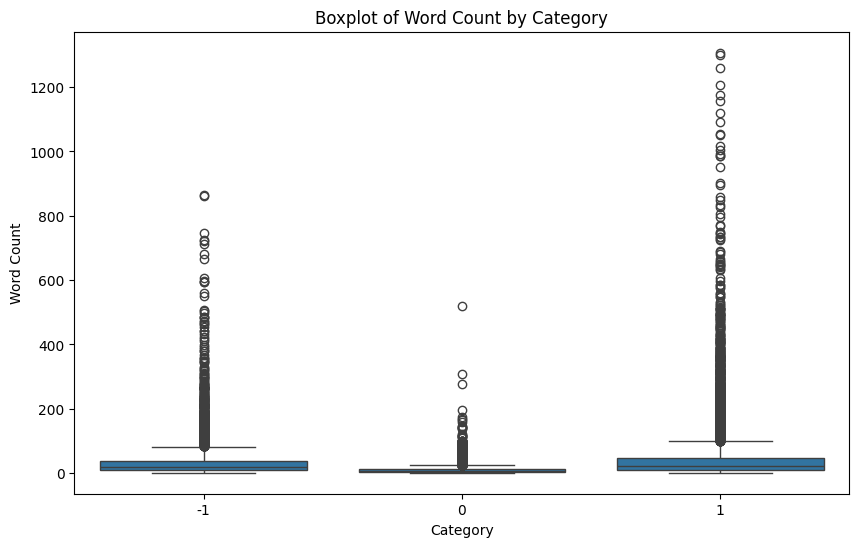

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='category', y='word_count')
plt.title('Boxplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

<Axes: xlabel='category', ylabel='word_count'>

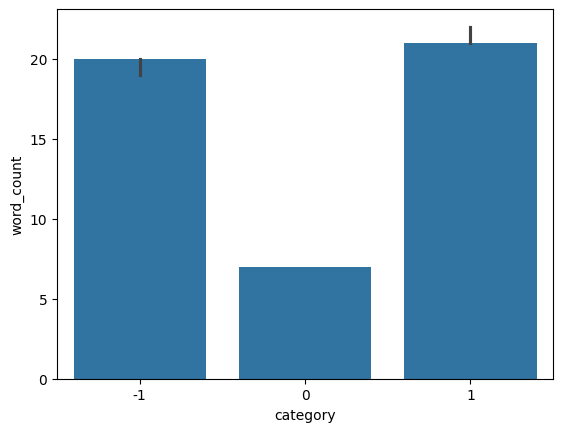

In [23]:
sns.barplot(data, x='category', y='word_count', estimator='median')

In [24]:
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

data['num_stop_words'] = data['clean_comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Arif\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
data.sample(5)

,clean_comment,category,word_count,num_stop_words
9715,good you nboa now just follow through with the...,1,31,15
31920,did they give any reason,0,5,3
14079,have you seen the arrival modi was like they g...,1,19,8
1305,“ the living owe respect the dead owe only the...,-1,26,8
12128,become interview with based security and the r...,1,18,7


In [26]:
print(stop_words)

{'here', 'his', 'weren', 'is', 'needn', 'and', 'won', 'below', 'off', 'too', 'if', 'ours', 'themselves', 'after', "didn't", 'further', 'by', 're', 'own', 'didn', 'nor', "don't", "i'm", "mightn't", 'why', 'her', "doesn't", 'over', "i'd", 'doing', 'so', 'down', 'i', 'wouldn', "i've", 'then', 'where', "wouldn't", 'under', 'than', 'who', 'from', 'has', "hadn't", 'be', 'just', 'mightn', "he'll", 'can', 'during', 'only', 'about', 'before', "it'll", 'doesn', 'once', 'being', 'she', "she's", 'its', "won't", 'we', 'any', 'him', "should've", 'ma', "you've", 'which', "haven't", 'o', 'all', "he's", 'itself', "shan't", 'them', 'until', 'theirs', 'wasn', "they'll", 'are', 'should', "wasn't", 'having', 'they', "you'll", "couldn't", 'to', 'me', 't', 'each', 'my', "we'd", 'that', "it's", 'yourself', 'how', 'into', "aren't", "mustn't", 'those', 'the', 'himself', 'our', 'shouldn', 'did', 'out', 'while', 'their', 'haven', "that'll", 'you', 'as', 'these', 'on', 've', 'myself', 'whom', 'y', 'up', 'again', '

stop words median

<Axes: xlabel='category', ylabel='num_stop_words'>

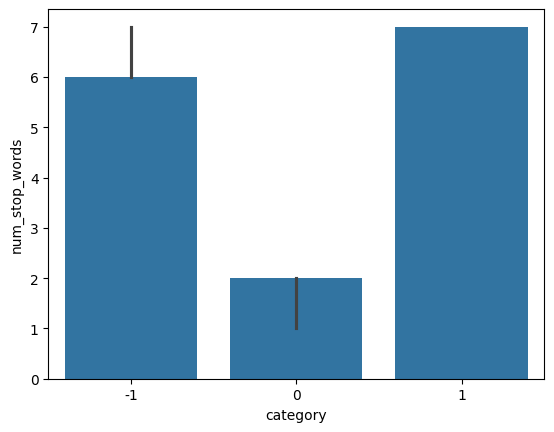

In [27]:
sns.barplot(data,x='category', y='num_stop_words', estimator='median')

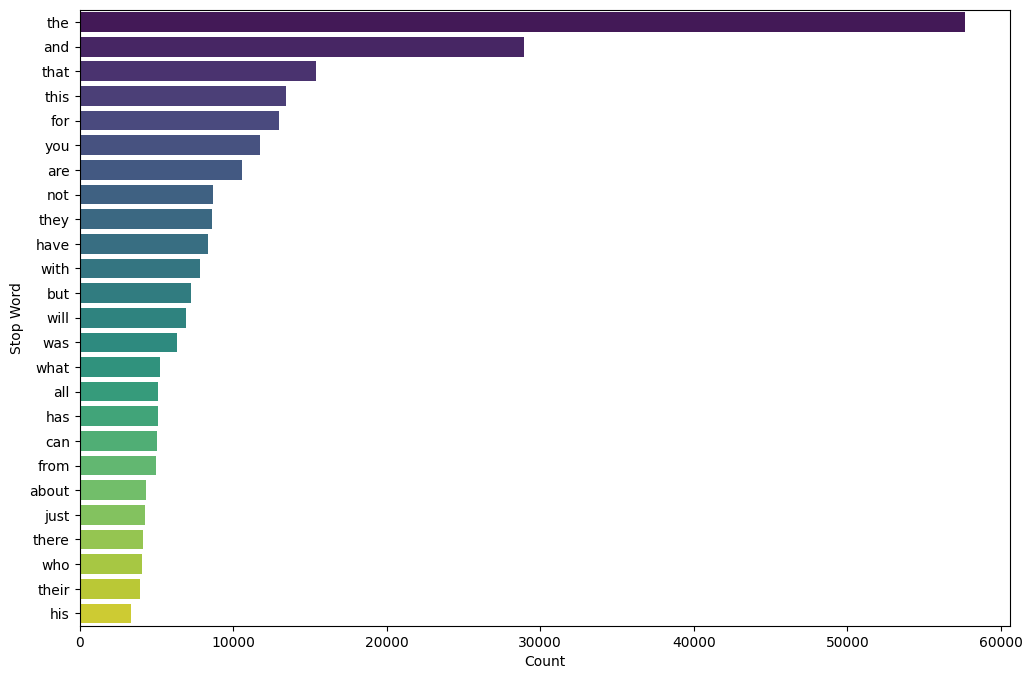

In [28]:
from collections import Counter

all_stop_words = [word for comment in data['clean_comment'] for word in comment.split() if word in stop_words]

most_common_stop_words = Counter(all_stop_words).most_common(25)

top_25_data = pd.DataFrame(most_common_stop_words, columns=['stop_word', 'count'])

plt.figure(figsize=(12,8))
sns.barplot(data=top_25_data, x='count', y='stop_word', palette='viridis')
plt.xlabel('Count')
plt.ylabel('Stop Word')
plt.show()

In [29]:
data['num_chars'] = data['clean_comment'].apply(len)

data.sample(5)

,clean_comment,category,word_count,num_stop_words,num_chars
15770,they look happy together also the way sana til...,1,23,5,137
26082,and only where yogiji spoke thus proven please...,1,12,4,66
35810,now instead tejasvi yadav tejasvi surya will d...,1,12,2,76
28934,our shoddy tik tok videos have much better edi...,-1,28,8,175
26795,metto nei panni povero cristo qualunque che no...,0,10,0,61


In [30]:
all_text = ' '.join(data['clean_comment'])

char_frequency = Counter(all_text)

char_frequency_data = pd.DataFrame(char_frequency.items(), columns=['characters', 'frequency']).sort_values(by='frequency', ascending=False)